### Частина перша: Знайомство з Pandas

**Завдання:**

1. Прочитайте дані з таблиці "Коефіцієнт народжуваності в регіонах України (1950—2019)" за [посиланням](https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C) за допомогою методу `read_html`.
2. Виведіть перші 5 рядків таблиці за допомогою методу `head`.
3. Визначте кількість рядків і стовпців в датафреймі (атрибут `shape`).
4. Замініть в таблиці значення "—" на значення NaN.
5. Визначте типи всіх стовпців за допомогою `dataframe.dtypes`.
6. Замініть типы нечислових колонок на числові. Підказка: це колонки, де знаходився символ "-".
7. Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи `isnull` і `sum`).
8. Видаліть з таблиці дані по всій країні (остання строка таблиці).
9. Замініть відсутні дані в стовпцях середніми значеннями по цим стовпцям (метод `fillna`).
10. Отримайте список регіонів, де рівень народжуваності в 2019 році був вище середнього по Україні.
11. В якому регіоні була найвища народжуваність в 2014 році?
12. Побудуйте стовбчасту діаграму народжуваності по регіонах в 2019 році.

Завдання 2.
Коефіцієнт народжуваності в регіонах України (1950—2019)
             Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0              Крим  230.0  206.0  160.0   130    73   126    —    —
1         Вінницька  224.0  192.0  142.0   124    84   112  109   76
2         Волинська  247.0  250.0  179.0   153   112   148  141  101
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4          Донецька  271.0  214.0  140.0   109    61    98   82    — 

Завдання 3.
Кількість рядків: 32
Кількість стовпців: 4 

Завдання 4.
               Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0                Крим  230.0  206.0  160.0   130    73   126  NaN  NaN
1           Вінницька  224.0  192.0  142.0   124    84   112  109   76
2           Волинська  247.0  250.0  179.0   153   112   148  141  101
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4            Донецька  271.0  214.0  140.0   109    61    98   82  NaN
5         Житомирськ

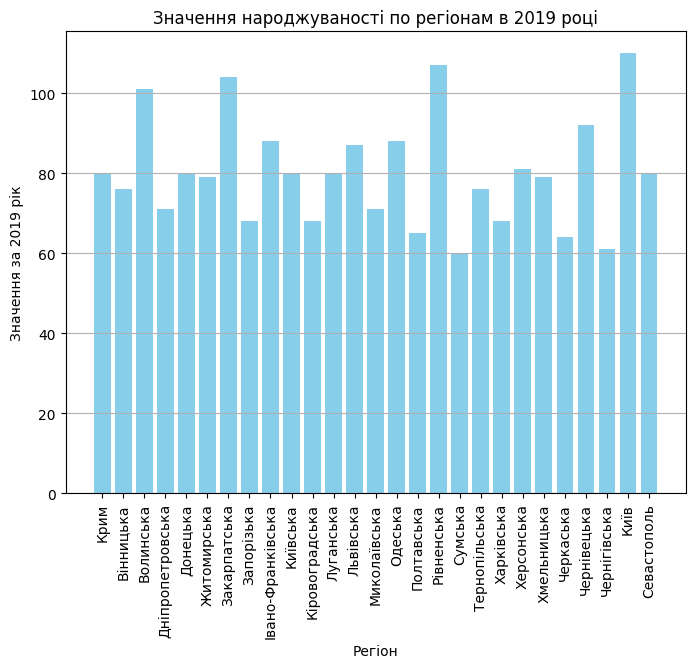

In [116]:
import matplotlib.pyplot as plt
import pandas as pd

path = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#"
data = pd.read_html(path, attrs={"class":"wikitable collapsible collapsed"})

# Виведення перших 5 рядків таблиці
print(f"Завдання 2.")
print(f"Коефіцієнт народжуваності в регіонах України (1950—2019)")
print(data[3].head(),"\n")

# Визначення кількості рядків і стовпців
rows, columns = data[1].shape
print(f"Завдання 3.")
print(f"Кількість рядків: {rows}")
print(f"Кількість стовпців: {columns} \n")

print(f"Завдання 4.")
# Заміна значень "—" на NaN
data[3].replace("—", np.nan, inplace=True)
print(data[3],"\n")

print(f"Завдання 5.")
# Визначення типів стовпців
print(data[3].dtypes,"\n")

print(f"Завдання 6.")
for column in data[3].columns:
    if column != "Регіон":
        data[3][column] = pd.to_numeric(data[3][column], errors='coerce')
print(data[3].dtypes,"\n")

print(f"Завдання 7.")
# Розрахунок частки пропусків в кожній колонці
print("\nЧастка пропусків в кожній колонці:")
print(data[3].isnull().sum(axis=0) , "\n")

print(f"Завдання 8.")
# Видалення останнього рядка (дані по всій країні)
data[3] = data[3].iloc[:-1]
print("Таблиця після видалення останнього рядка:")
print(data[3],"\n")

print(f"Завдання 9.")
df = data[3]
df[['1950','1960','1970','1990','2000','2012','2014','2019']] = df[['1950','1960','1970','1990','2000','2012','2014','2019']].fillna(data[3].mean(numeric_only=True).round(2))
print("Таблиця після заміни відсутніх значень середніми:")
print(data[3],"\n")


print(f"Завдання 10.")
# Обчисліть середній рівень народжуваності по Україні в 2019 році
average_birth_rate_2019 = data[3]['2019'].mean()
# Виберіть регіони, де рівень народжуваності в 2019 році був вище середнього
higher_than_average_regions = data[3][data[3]['2019'] > average_birth_rate_2019]['Регіон']
# Виведіть список цих регіонів
print("Регіони з рівнем народжуваності вище середнього в 2019 році:")
print(higher_than_average_regions ,"\n")

print(f"Завдання 11.")
max_value = df['2014'].max()
row_with_max_value = df[df['2014'] == max_value]['Регіон'].values[0]
print(f"Найвища народжуваність в 2014 році була в області {row_with_max_value} з народжуваністю {max_value} на 1000 осіб. \n")

print(f"Завдання 12.")
df = pd.DataFrame(data[3])
plt.figure(figsize=(8, 6))
plt.bar(df['Регіон'], df['2019'], color='skyblue')
plt.xlabel('Регіон')
plt.ylabel('Значення за 2019 рік')
plt.title('Значення народжуваності по регіонам в 2019 році')
plt.grid(axis='y')
plt.xticks(rotation=90)
plt.show()
